## **Presented By:** 
### - Azzouzi Ousssama Abderraouf

# 1- Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



# 2- loading datasets

In [2]:
df = pd.read_csv('simulation_data_1000.csv')
df.head()

,e,e_1,e_2,e_3,theta,ref,torque
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003042,0.000000,0.000000,0.000000,0.001081,0.004123,6.541053
2,0.003875,0.003042,0.000000,0.000000,0.004371,0.008246,2.246437
3,0.004161,0.003875,0.003042,0.000000,0.008207,0.012368,1.195672
4,0.004246,0.004161,0.003875,0.003042,0.012243,0.016489,0.807004


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001000 entries, 0 to 1000999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   e       1001000 non-null  float64
 1   e_1     1001000 non-null  float64
 2   e_2     1001000 non-null  float64
 3   e_3     1001000 non-null  float64
 4   theta   1001000 non-null  float64
 5   ref     1001000 non-null  float64
 6   torque  1001000 non-null  float64
dtypes: float64(7)
memory usage: 53.5 MB


# 3- Data Preprocessing

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
e,1001000.0,0.002758,0.024460,-0.067246,-0.011763,0.002230,0.017451,0.089035
e_1,1001000.0,0.002756,0.024449,-0.067246,-0.011740,0.002212,0.017434,0.089035
e_2,1001000.0,0.002754,0.024437,-0.067246,-0.011720,0.002193,0.017412,0.089035
e_3,1001000.0,0.002752,0.024425,-0.067246,-0.011698,0.002175,0.017390,0.089035
theta,1001000.0,0.047937,0.617453,-1.543894,-0.315264,0.040661,0.431309,1.543903
ref,1001000.0,0.050695,0.639438,-1.569760,-0.328445,0.043661,0.450121,1.569756
torque,1001000.0,0.417424,4.275082,-10.118170,-2.041263,0.340463,2.841374,147.890634


In [5]:
# df.isnull().sum(), df.isna().sum(), df.shape, df.dtypes, df.columns, df.nunique()

print('null values in the dataset:', df.isnull().sum().sum())
print('na values in the dataset:', df.isna().sum().sum())
print('shape of the dataset:', df.shape)
print('data types of the dataset:', df.dtypes)
print('columns of the dataset:', df.columns)
# print('unique values in the dataset:', df.nunique())


null values in the dataset: 0
na values in the dataset: 0
shape of the dataset: (1001000, 7)
data types of the dataset: e         float64
e_1       float64
e_2       float64
e_3       float64
theta     float64
ref       float64
torque    float64
dtype: object
columns of the dataset: Index(['e', 'e_1', 'e_2', 'e_3', 'theta', 'ref', 'torque'], dtype='object')


# 4- Feature Selection

In [6]:
# picking 20% of the data

# df = df[:int(len(df)*0.2)]
df.shape


(1001000, 7)

In [7]:
# normalizing the data
scaler = MinMaxScaler()
# df = scaler.fit_transform(df)
# standardizing the data
scaler2 = StandardScaler()



target = df['torque']

# features to drop
redundant_features = ['torque', 'e_1', 'e_2', 'e_3']

features2 = df.drop(columns=redundant_features)
features = df.drop(columns='torque')



In [8]:
features.shape, target.shape, features2.shape

((1001000, 6), (1001000,), (1001000, 3))

In [9]:
features = scaler.fit_transform(features)
features = scaler2.fit_transform(features)
features.shape

(1001000, 6)

# 5- Data Splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)
X,x,Y,y = train_test_split(features2, target, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape, x.shape, Y.shape, y.shape

((800800, 6),
 (200200, 6),
 (800800,),
 (200200,),
 (800800, 3),
 (200200, 3),
 (800800,),
 (200200,))

# 6- Model Selection, Training and Testing

In [11]:
import time
Start_Time = 0
Time = 0

time_Per= pd.DataFrame({
    'model_name': ['Linear Regression', 'Random Forest', 'KNN', 'XGBoost'],
    'time': [0, 0, 0, 0]
})

time_noPer = pd.DataFrame({
    'model_name': ['Linear Regression', 'Random Forest', 'KNN', 'XGBoost'],
    'time': [0, 0, 0, 0]
})


### **6-A- LinearRegression**

In [12]:
#loading the saved models
from joblib import load
# load the model from disk
lr = load('model_lr.pkl')
rf = load('model_rf.pkl')
knn = load('model_knn.pkl')
xgb = load('model_xgb.pkl')

lr2 = load('model_lr2.pkl')
rf2 = load('model_rf2.pkl')
knn2 = load('model_knn2.pkl')
xgb2 = load('model_xgb2.pkl')


In [13]:
# building linear regression model
from sklearn.linear_model import LinearRegression
#loading the model

Start_Time = time.time()
# model_lr = LinearRegression()
model_lr = lr
# model_lr.fit(X_train, y_train)
Time = time.time() - Start_Time
time_Per['time'][0] = Time

Start_Time = time.time()
model_lr2 = lr2
Time = time.time() - Start_Time
time_noPer['time'][0] = Time


C:\Users\test\AppData\Local\Temp\ipykernel_24872\447202484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_Per['time'][0] = Time
C:\Users\test\AppData\Local\Temp\ipykernel_24872\447202484.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.04440140724182129' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  time_Per['time'][0] = Time
C:\Users\test\AppData\Local\Temp\ipykernel_24872\447202484.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_noPer['time'][0] = Time


In [29]:
y_pred = model_lr.predict(X_test)
score = model_lr.score(X_test, y_test)

y_pred2 = model_lr2.predict(x)
score2 = model_lr2.score(x, y)


print('score:', score)
print('mean squared error:', mean_squared_error(y_test, y_pred))
print('mean absolute error:', mean_absolute_error(y_test, y_pred))

print('Second model')
print('score:', score2)
print('mean squared error:', mean_squared_error(y, y_pred2))
print('mean absolute error:', mean_absolute_error(y, y_pred2))

score: 0.9999999999991078
mean squared error: 1.5212956617123542e-11
mean absolute error: 1.0132866839296502e-06
Second model
score: 0.7851255920812334
mean squared error: 3.6637405130216436
mean absolute error: 0.8831797388725046


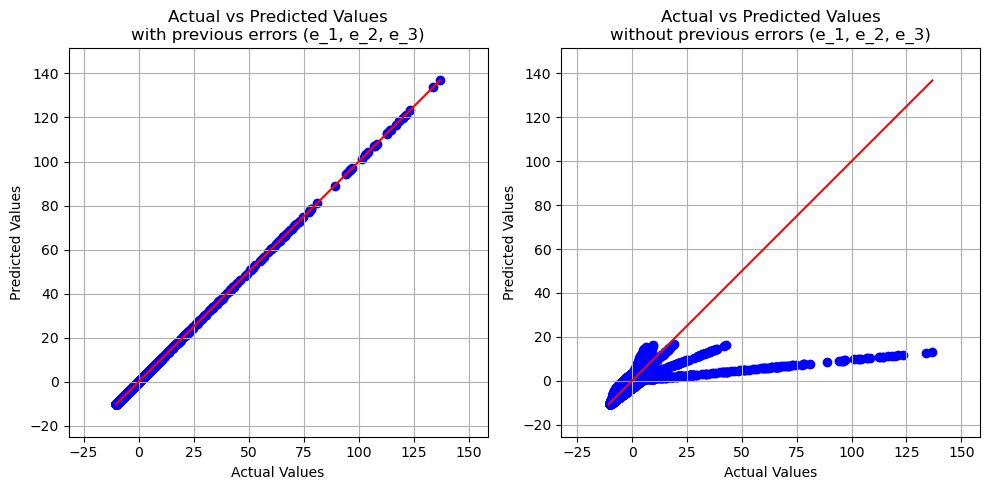

In [15]:
def plot_predictions(y_test, y_pred, y, y_pred2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

    # First plot
    axs[0].scatter(y_test, y_pred, color='blue')
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    axs[0].plot([p1, p2], [p1, p2], 'red')
    axs[0].grid(True)
    axs[0].set_xlabel('Actual Values')
    axs[0].set_ylabel('Predicted Values')
    axs[0].set_title('Actual vs Predicted Values\nwith previous errors (e_1, e_2, e_3)')
    axs[0].axis('equal')

    # Second plot
    axs[1].scatter(y, y_pred2, color='blue')
    p1 = max(max(y_pred2), max(y))
    p2 = min(min(y_pred2), min(y))
    axs[1].plot([p1, p2], [p1, p2], 'red')
    axs[1].grid(True)
    axs[1].set_xlabel('Actual Values')
    axs[1].set_ylabel('Predicted Values')
    axs[1].set_title('Actual vs Predicted Values\nwithout previous errors (e_1, e_2, e_3)')
    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()

# Calling the function with the data
plot_predictions(y_test, y_pred, y, y_pred2)

### **6-B- RandomForestRegressor**

In [16]:
# building random forest model
from sklearn.ensemble import RandomForestRegressor

Start_Time = time.time()
model_rf = rf
Time = time.time() - Start_Time
time_Per['time'][1] = Time

Start_Time = time.time()
model_rf2 = rf2
Time = time.time() - Start_Time
time_noPer['time'][1] = Time


C:\Users\test\AppData\Local\Temp\ipykernel_24872\3336027774.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_noPer['time'][1] = Time


In [17]:
y_pred_rf = model_rf.predict(X_test)
score_rf = model_rf.score(X_test, y_test)

y_pred_rf2 = model_rf2.predict(x)
score_rf2 = model_rf2.score(x, y)

print('score:', score_rf)
print('mean squared error:', mean_squared_error(y_test, y_pred_rf))
print('mean absolute error:', mean_absolute_error(y_test, y_pred_rf))
print('r2 score:', r2_score(y_test, y_pred_rf))

print('Second model')
print('score:', score_rf2)
print('mean squared error:', mean_squared_error(y, y_pred_rf2))
print('mean absolute error:', mean_absolute_error(y, y_pred_rf2))
print('r2 score:', r2_score(y, y_pred_rf2))

score: 0.9998566277671698
mean squared error: 0.0024445845503437667
mean absolute error: 0.025191384852702833
r2 score: 0.9998566277671698
Second model
score: 0.9277919669383686
mean squared error: 1.2311912742699402
mean absolute error: 0.7794140112370161
r2 score: 0.9277919669383686


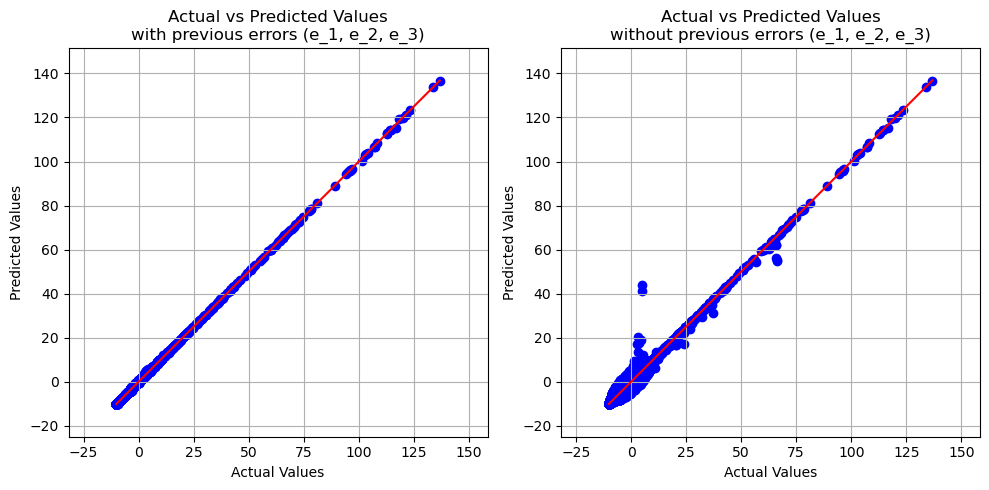

In [18]:
plot_predictions(y_test, y_pred_rf, y, y_pred_rf2)


### **6-C- KNN**

In [19]:
# building KNN model
from sklearn.neighbors import KNeighborsRegressor

# scorer_list = []
# rmse = []
# mae = []
# k = []

# scorer_list2 = []
# rmse2 = []
# mae2 = []
# k2 = []

# for i in range(1, 11):
#     model = KNeighborsRegressor(n_neighbors=i)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     score = model.score(X_test, y_test)
#     result1 = np.sqrt(mean_squared_error(y_test, y_pred))
#     result2 = mean_absolute_error(y_test, y_pred)
#     rmse.append(result1)
#     mae.append(result2)
#     scorer_list.append(score)
#     k.append(i)

# for i in range(1, 11):
#     model = KNeighborsRegressor(n_neighbors=i)
#     model.fit(X, Y)
#     y_pred = model.predict(x)
#     score = model.score(x, y)
#     result1 = np.sqrt(mean_squared_error(y, y_pred))
#     result2 = mean_absolute_error(y, y_pred)
#     rmse2.append(result1)
#     mae2.append(result2)
#     scorer_list2.append(score)
#     k2.append(i)

# models_knn = pd.DataFrame({'k': k, 'rmse': rmse, 'mae': mae, 'score': scorer_list})    
# models_knn2 = pd.DataFrame({'k': k2, 'rmse': rmse2, 'mae': mae2, 'score': scorer_list2})

# best_k = k[scorer_list.index(max(scorer_list))]
# best_k2 = k2[scorer_list2.index(max(scorer_list2))]

# print('best k:', best_k)

# print('best k:', best_k2)


KeyboardInterrupt



### **6-C- KNN**

In [20]:
# building KNN model
from sklearn.neighbors import KNeighborsRegressor

Start_Time = time.time()
model_knn = knn
time_Per['time'][2] = Time

Start_Time = time.time()
model_knn2 = knn2
time_noPer['time'][2] = Time

C:\Users\test\AppData\Local\Temp\ipykernel_24872\4278201617.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_noPer['time'][2] = Time


In [21]:
y_pred_knn = model_knn.predict(X_test)
score_knn = model_knn.score(X_test, y_test)

y_pred_knn2 = model_knn2.predict(x)
score_knn2 = model_knn2.score(x, y)

print('score:', score_knn)
print('mean squared error:', mean_squared_error(y_test, y_pred_knn))
print('mean absolute error:', mean_absolute_error(y_test, y_pred_knn))
print('r2 score:', r2_score(y_test, y_pred_knn))

print('Second model')
print('score:', score_knn2)
print('mean squared error:', mean_squared_error(y, y_pred_knn2))
print('mean absolute error:', mean_absolute_error(y, y_pred_knn2))
print('r2 score:', r2_score(y, y_pred_knn2))


score: 0.998437424589842
mean squared error: 0.026642869619967955
mean absolute error: 0.1041047528515468
r2 score: 0.998437424589842
Second model
score: 0.9336087732425604
mean squared error: 1.13201115729145
mean absolute error: 0.7536897986749247
r2 score: 0.9336087732425604


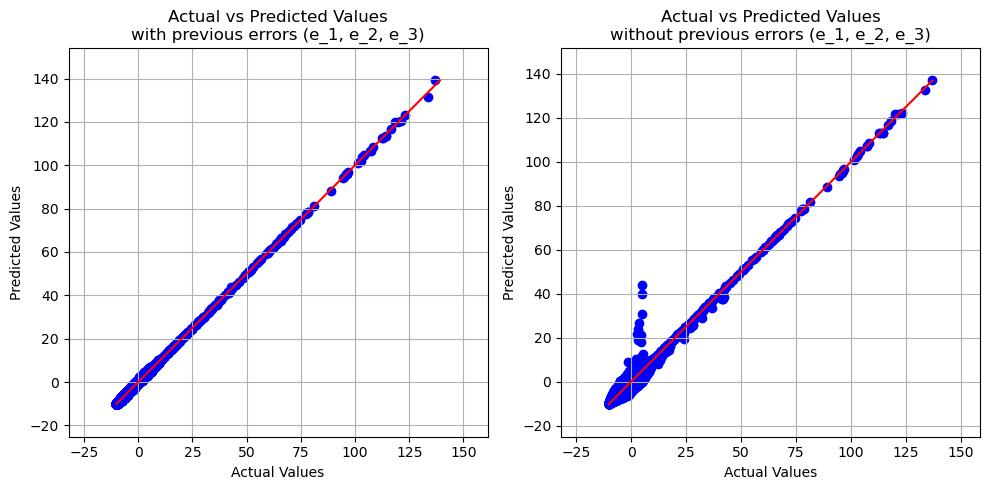

In [22]:
# plotting the results
plot_predictions(y_test, y_pred_knn, y, y_pred_knn2)

### **6-D- XGBRegressor**

In [23]:
# building XGBoost model
from xgboost import XGBRegressor

Start_Time = time.time()
model_xgb = xgb
Time = time.time() - Start_Time
time_Per['time'][3] = Time

Start_Time = time.time()
model_xgb2 = xgb2
Time = time.time() - Start_Time
time_noPer['time'][3] = Time


C:\Users\test\AppData\Local\Temp\ipykernel_24872\3074747232.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_noPer['time'][3] = Time


In [24]:
y_pred_xgb = model_xgb.predict(X_test)
score_xgb = model_xgb.score(X_test, y_test)

y_pred_xgb2 = model_xgb2.predict(x)
score_xgb2 = model_xgb2.score(x, y)

print('score:', score_xgb)
print('mean squared error:', mean_squared_error(y_test, y_pred_xgb))
print('mean absolute error:', mean_absolute_error(y_test, y_pred_xgb))
print('r2 score:', r2_score(y_test, y_pred_xgb))

print('Second model')
print('score:', score_xgb2)
print('mean squared error:', mean_squared_error(y, y_pred_xgb2))
print('mean absolute error:', mean_absolute_error(y, y_pred_xgb2))
print('r2 score:', r2_score(y, y_pred_xgb2))


score: 0.9975605555444684
mean squared error: 0.04159402493560789
mean absolute error: 0.15116944488918033
r2 score: 0.9975605555444684
Second model
score: 0.939310586659471
mean squared error: 1.0347917396066633
mean absolute error: 0.7374918785974733
r2 score: 0.939310586659471


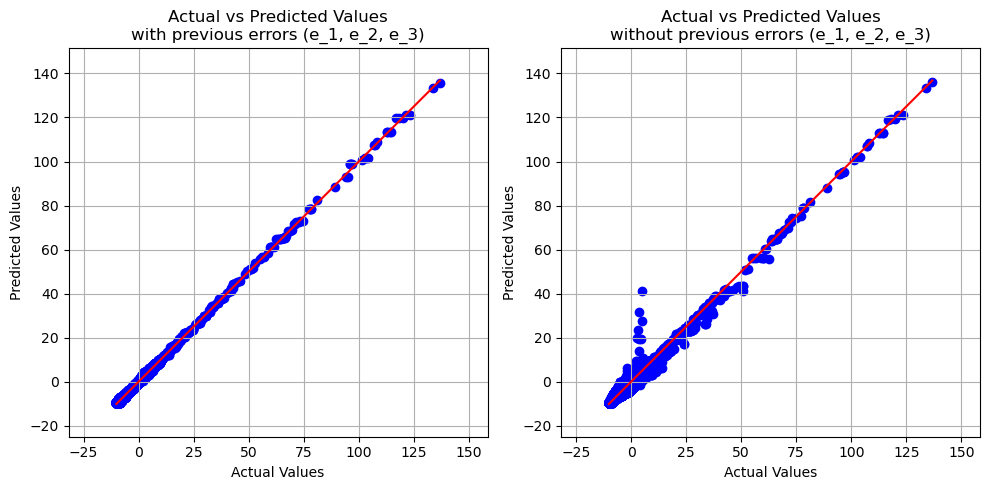

In [25]:
# plotting the results
plot_predictions(y_test, y_pred_xgb, y, y_pred_xgb2)

In [30]:
model_performance_Per = pd.DataFrame({
    'model_name': ['Linear Regression', 'Random Forest', 'KNN', 'XGBoost'],
    'r2_score': [score, score_rf, score_knn, score_xgb],
    'mse': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_knn), mean_squared_error(y_test, y_pred_xgb)],
    'mae': [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_knn), mean_absolute_error(y_test, y_pred_xgb)]
})

model_performance_noPer = pd.DataFrame({
    'model_name': ['Linear Regression', 'Random Forest', 'KNN', 'XGBoost'],
    'r2_score': [score2, score_rf2, score_knn2, score_xgb2],
    'mse': [mean_squared_error(y, y_pred2), mean_squared_error(y, y_pred_rf2), mean_squared_error(y, y_pred_knn2), mean_squared_error(y, y_pred_xgb2)],
    'mae': [mean_absolute_error(y, y_pred2), mean_absolute_error(y, y_pred_rf2), mean_absolute_error(y, y_pred_knn2), mean_absolute_error(y, y_pred_xgb2)]
})


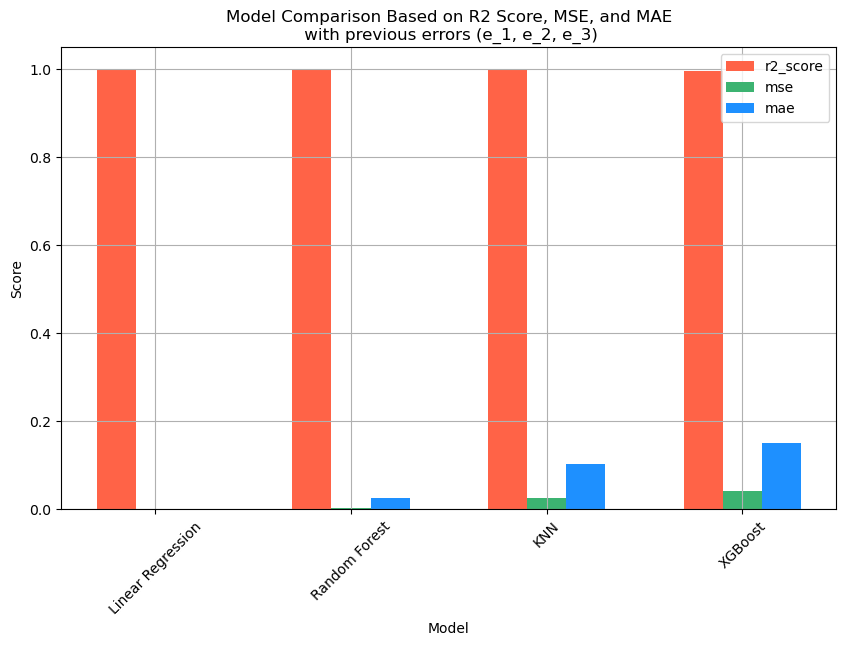

In [32]:
# Model Comparison Based on R2 Score, MSE, and MAE with previous errors (e_1, e_2, e_3)
model_performance_Per.sort_values('r2_score', ascending=False, inplace=True)

# Define the width of the bars
width = 0.2

# Create an array with the positions of the bars on the x axis
r1 = np.arange(len(model_performance_Per['model_name']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.figure(figsize=(10, 6))

# Plot each bar at its respective position with new colors
plt.bar(r1, model_performance_Per['r2_score'], color='tomato', width=width, label='r2_score')
plt.bar(r2, model_performance_Per['mse'], color='mediumseagreen', width=width, label='mse')
plt.bar(r3, model_performance_Per['mae'], color='dodgerblue', width=width, label='mae')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison Based on R2 Score, MSE, and MAE\n with previous errors (e_1, e_2, e_3)')
plt.grid(True)

# Add the model names as x-ticks in the middle of the grouped bars
plt.xticks([r + width for r in range(len(model_performance_Per['model_name']))], model_performance_Per['model_name'], rotation=45)

plt.legend()
plt.show()

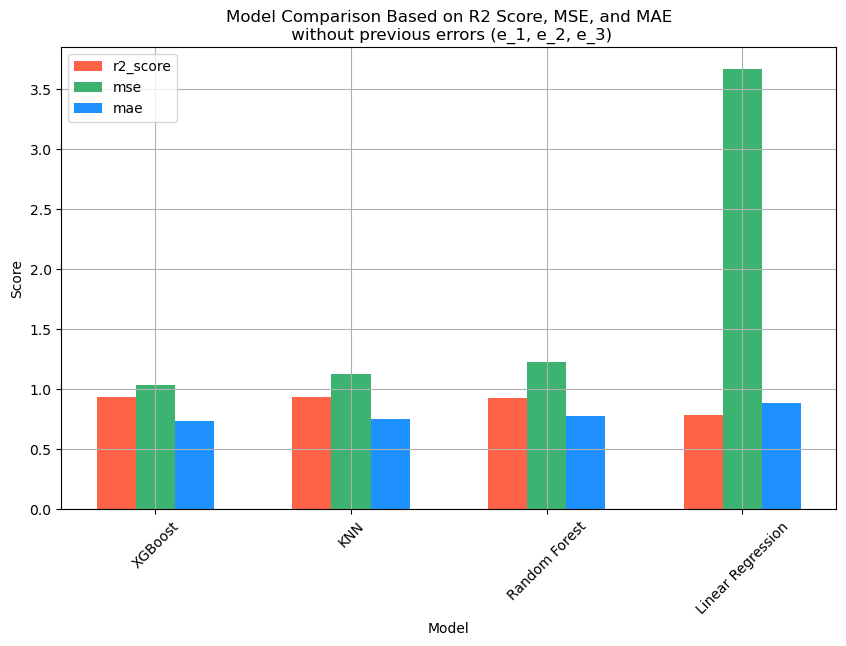

In [35]:
# Model Comparison Based on R2 Score, MSE, and MAE without previous errors (e_1, e_2, e_3)
model_performance_noPer.sort_values('r2_score', ascending=False, inplace=True)

# Define the width of the bars
width = 0.2

# Create an array with the positions of the bars on the x axis
r1 = np.arange(len(model_performance_noPer['model_name']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.figure(figsize=(10, 6))

# Plot each bar at its respective position with new colors
plt.bar(r1, model_performance_noPer['r2_score'], color='tomato', width=width, label='r2_score')
plt.bar(r2, model_performance_noPer['mse'], color='mediumseagreen', width=width, label='mse')
plt.bar(r3, model_performance_noPer['mae'], color='dodgerblue', width=width, label='mae')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison Based on R2 Score, MSE, and MAE\n without previous errors (e_1, e_2, e_3)')
plt.grid(True)

# Add the model names as x-ticks in the middle of the grouped bars
plt.xticks([r + width for r in range(len(model_performance_noPer['model_name']))], model_performance_noPer['model_name'], rotation=45)

plt.legend()
plt.show()

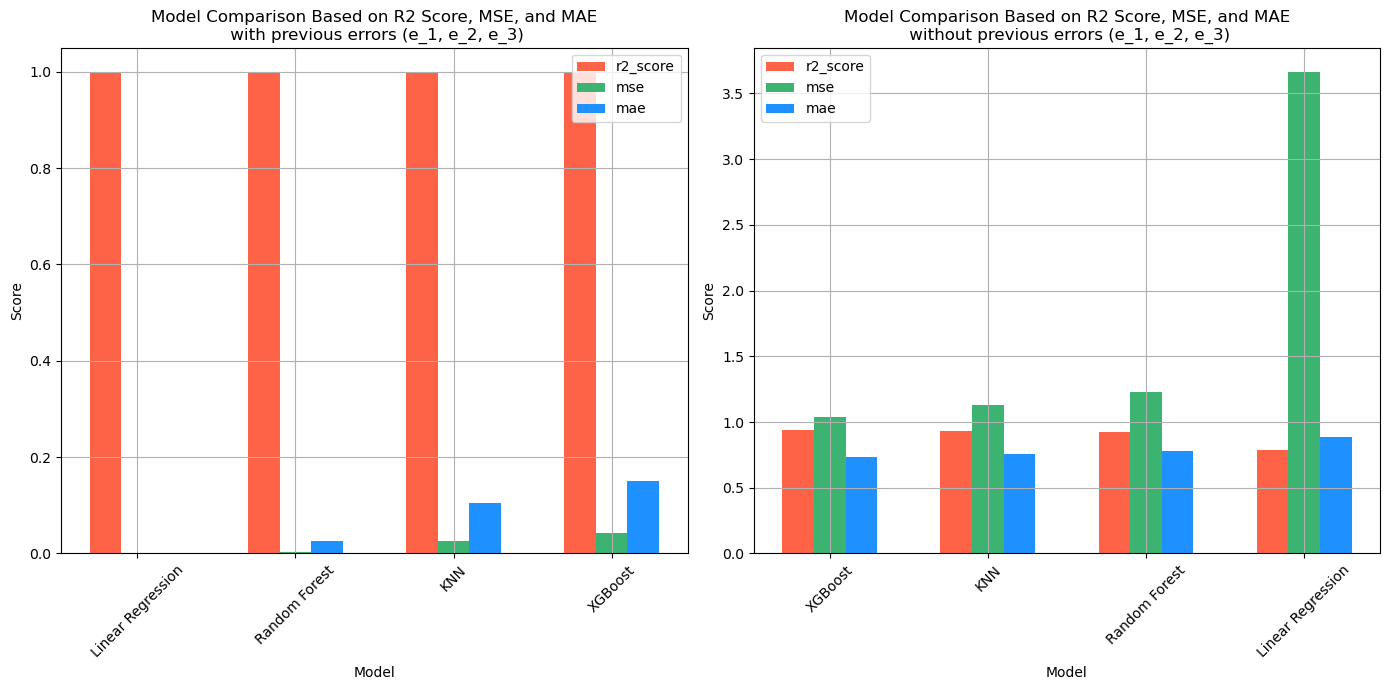

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the dataframes
model_performance_Per.sort_values('r2_score', ascending=False, inplace=True)
model_performance_noPer.sort_values('r2_score', ascending=False, inplace=True)

# Define the width of the bars
width = 0.2

# Create an array with the positions of the bars on the x axis
r1 = np.arange(len(model_performance_Per['model_name']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

# Create a figure with two subplots, one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(14,7))

# Plot the first subplot
axs[0].bar(r1, model_performance_Per['r2_score'], color='tomato', width=width, label='r2_score')
axs[0].bar(r2, model_performance_Per['mse'], color='mediumseagreen', width=width, label='mse')
axs[0].bar(r3, model_performance_Per['mae'], color='dodgerblue', width=width, label='mae')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Score')
axs[0].set_title('Model Comparison Based on R2 Score, MSE, and MAE\n with previous errors (e_1, e_2, e_3)')
axs[0].grid(True)
axs[0].set_xticks([r + width for r in range(len(model_performance_Per['model_name']))])
axs[0].set_xticklabels(model_performance_Per['model_name'], rotation=45)
axs[0].legend()

# Plot the second subplot
axs[1].bar(r1, model_performance_noPer['r2_score'], color='tomato', width=width, label='r2_score')
axs[1].bar(r2, model_performance_noPer['mse'], color='mediumseagreen', width=width, label='mse')
axs[1].bar(r3, model_performance_noPer['mae'], color='dodgerblue', width=width, label='mae')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Score')
axs[1].set_title('Model Comparison Based on R2 Score, MSE, and MAE\n without previous errors (e_1, e_2, e_3)')
axs[1].grid(True)
axs[1].set_xticks([r + width for r in range(len(model_performance_noPer['model_name']))])
axs[1].set_xticklabels(model_performance_noPer['model_name'], rotation=45)
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

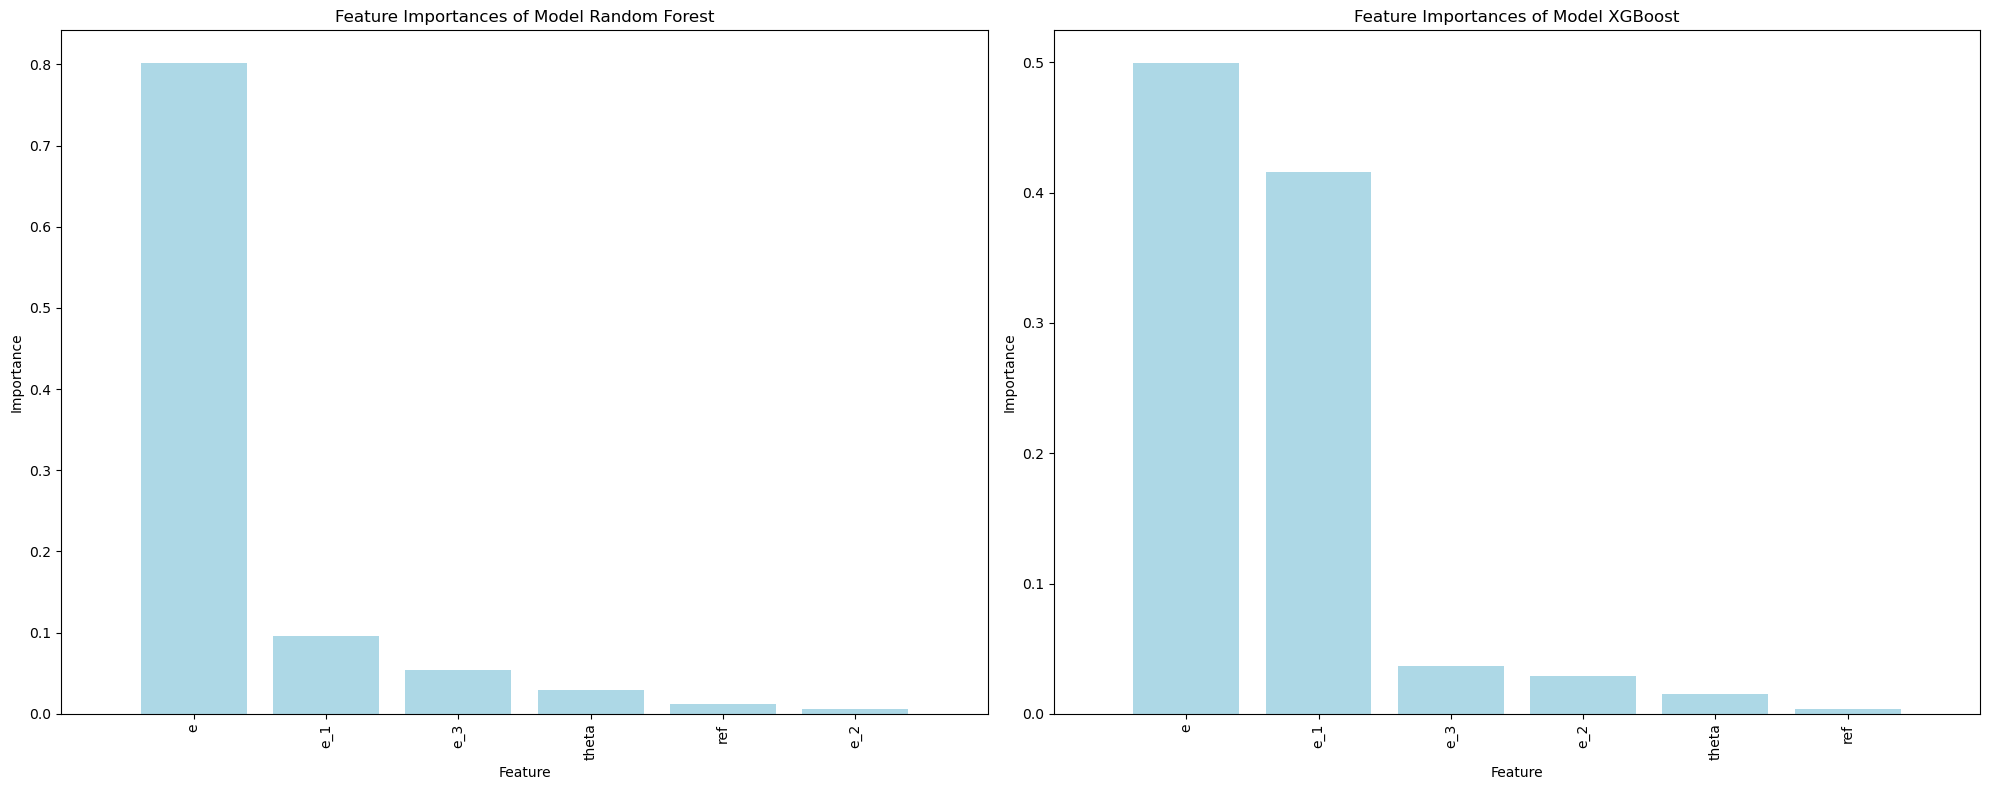

In [52]:
# Feature Importances
def plot_feature_importances(models, feature_names, models_names):
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

    for i, model in enumerate(models):
        feature_importances = model.feature_importances_
        indices = np.argsort(feature_importances)[::-1]

        # Rearrange feature names so they match the sorted feature importances
        sorted_feature_names = [feature_names[i] for i in indices]

        axs[i].bar(range(len(indices)), feature_importances[indices], color='lightblue', align='center')
        axs[i].set_xticks(range(len(indices)))
        axs[i].set_xticklabels(sorted_feature_names, rotation=90)
        axs[i].set_xlim([-1, len(indices)])
        axs[i].set_xlabel('Feature')
        axs[i].set_ylabel('Importance')
        axs[i].set_title('Feature Importances of Model ' + str(models_names[i]))

    plt.tight_layout()
    plt.show()


models = [model_rf, model_xgb]
models_names = ['Random Forest', 'XGBoost']
plot_feature_importances(models, df.columns, models_names)



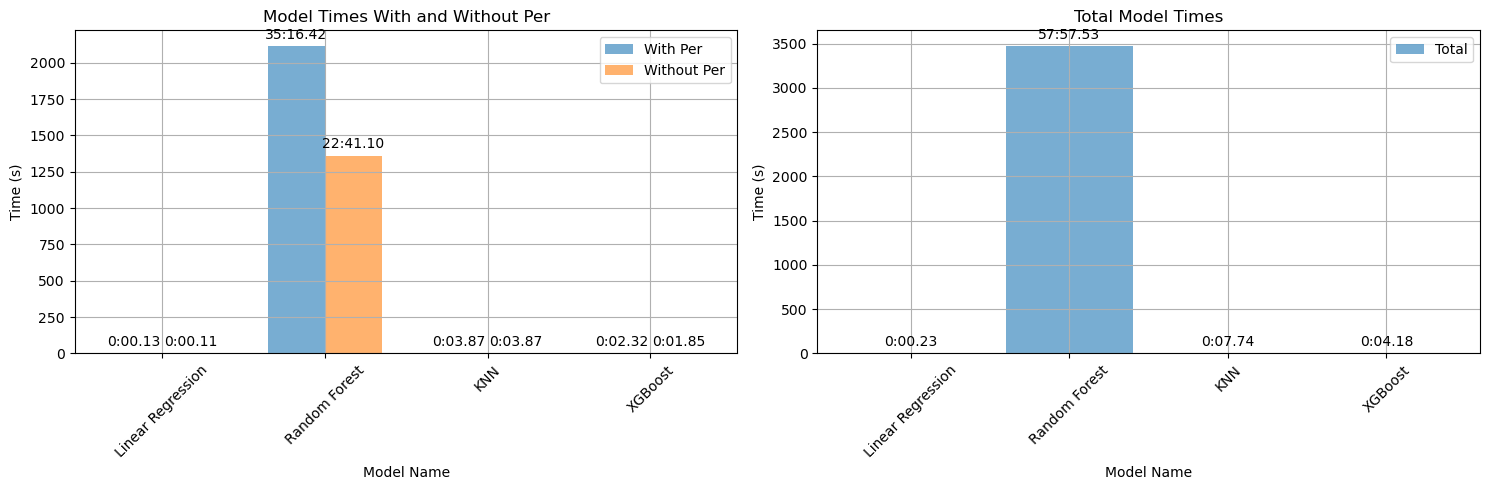

In [70]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_times(time_Per, time_noPer):
    total_time = time_Per['time'] + time_noPer['time']
    x = np.arange(len(time_Per['model_name']))  # the label locations
    width = 0.35  # the width of the bars

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

    # Function to add value annotations on top of the bars
    def annotate_bars(rects, ax):
        for rect in rects:
            height = rect.get_height()
            minutes, seconds = divmod(height, 60)
            ax.annotate('{}:{:05.2f}'.format(int(minutes), seconds),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # First plot
    rects1 = axs[0].bar(x - width/2, time_Per['time'], width, label='With Per', alpha=0.6)
    rects2 = axs[0].bar(x + width/2, time_noPer['time'], width, label='Without Per', alpha=0.6)
    axs[0].set_xlabel('Model Name')
    axs[0].set_ylabel('Time (s)')
    axs[0].set_title('Model Times With and Without Per')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(time_Per['model_name'], rotation=45)
    axs[0].legend()
    axs[0].grid(True)
    annotate_bars(rects1, axs[0])  # Add value annotations for 'With Per'
    annotate_bars(rects2, axs[0])  # Add value annotations for 'Without Per'

    # Second plot
    rects3 = axs[1].bar(time_Per['model_name'], total_time, label='Total', alpha=0.6)
    axs[1].set_xlabel('Model Name')
    axs[1].set_ylabel('Time (s)')
    axs[1].set_title('Total Model Times')
    axs[1].legend()
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(rotation=45, labels=time_Per['model_name'])
    axs[1].grid(True)
    annotate_bars(rects3, axs[1])  # Add value annotations for 'Total'

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_model_times(time_Per, time_noPer)

In [71]:
# saving the models
import joblib

joblib.dump(model_lr, 'model_lr.pkl')
joblib.dump(model_rf, 'model_rf.pkl')
joblib.dump(model_knn, 'model_knn.pkl')
joblib.dump(model_xgb, 'model_xgb.pkl')

joblib.dump(model_lr2, 'model_lr2.pkl')
joblib.dump(model_rf2, 'model_rf2.pkl')
joblib.dump(model_knn2, 'model_knn2.pkl')
joblib.dump(model_xgb2, 'model_xgb2.pkl')



['model_xgb2.pkl']